In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys

Libraries

In [3]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import scipy.io
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Neural Network

In [4]:
def sigmoid(x):
    """
    Prameters:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """

    s = 1 / (1 + np.exp(-x))

    return s

# numpy에서 제공하는 함수인 np.zeros((shape))를 사용해서 파라미터들을 0으로 초기화하여 반환하는 함수를 구현
# Creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
def initialize_with_zeros(dim):
    """
    Parameters:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    w = np.zeros((dim, 1))
    b = 0.0

    return w, b

# BackPropagation을 위해 gradient와 cost function 구현
def propagate(w, b, X, Y):
    """
    Parameters:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1 / m * np.sum(np.dot(np.log(A), Y.T) + np.dot(np.log(1 - A), (1 - Y.T)))

    # 기울기 구하기 위해 BackPropagation
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}

    return grads, cost

# Optimizes w and b by running a gradient descent algorithm
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    Parameters
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    # cost, gradient 계산
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        m = X.shape[1]
        w = w - np.dot(learning_rate, dw)
        b = b - np.dot(learning_rate, db)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

# Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
def predict(w, b, X):
    '''
    Parameters:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid((np.dot(w.T, X) + b))

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    return Y_prediction

# model: 위의 함수들을 불러와 logistic regression
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Paramters:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Error
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

In [5]:
sigmoid(10)

0.9999546021312976

데이터 불러오기

In [6]:
document_nr = 500
formal_data = pd.read_csv('/content/drive/MyDrive/projectFiles/formal_data.csv', header = 0, delimiter="\t", nrows=500)
formal_data.values [3]
bodies = formal_data.values [:,3]
titles =  formal_data.values [:,2]
formal_articles = list(para.lower() for para in (titles + "." + bodies))
formal_sample  = formal_articles[0]

articles_size = []

for article in formal_articles:
    articles_size.append(len(article))

print("Total formal article",len(formal_articles))
print("average: ",np.average(articles_size))
print("max",np.max(articles_size))
print("min",np.min(articles_size))

Total formal article 500
average:  1987.244
max 5408
min 848


In [7]:
informal_data = pd.read_excel('/content/drive/MyDrive/projectFiles/informal_data.xlsx').values
informal_articles=  list(para.lower() for para in informal_data[:,0])
informal_sample = informal_articles[0]
informal_articles_size = []

for article in informal_articles:
    informal_articles_size.append(len(article))

print("Total number of informal text",len(informal_articles))
print("average: ",np.average(informal_articles_size))
print("max",np.max(informal_articles_size))
print("min",np.min(informal_articles_size))

Total number of informal text 500
average:  1505.258
max 25467
min 20


데이터 전처리

In [8]:
formal_pronoun_list = [ "we", "they",   "their", "theirs", "themselves", "us", "our", "ours", "ourselves", "its", "itself" ]
informal_pronoun_list = ["I", "you","me", "my", "mine", "your", "yours", "myself", "yourself","yourselves"]
formal_vocab_list = [] # formal_words.txt
informal_vocab_list = [] # iformal_words.txt
pass_nr = act_nr  = avg_sentence_lenth = 0
punctuations = [",", ".", ";",":","-","\"","?","!","(",")"]


In [9]:
def check_occur(word_list, word): #check the occurance of one word in a sentence 
    n = 0
    for w in word_list:
        w_new =  w.translate({ord(p): None for p in punctuations}) #get rid of the punctuations
        if word.lower() == w.lower():
            n = n + 1
    return n
            


def check_tone_nr(art, typ): # check the occurance a list of word appears in a sentence
    nr = 0
    art_w = art.split()
    for ele in typ:
        if ele.lower() in art_w:
            nr = nr + check_occur(art_w, ele.lower())
            
    return nr

def phrasal(verbs, sents): # count occurance of a specific phrasal verb
    nr_list = []
    for verb in verbs:
        nr_list.append(check_occur(sents, verb))
    return min(nr_list)

def check_word_phrasal(art_in_sent, typ): #count the total amount of phrasal verbs in the article
    nr = 0
    for sent in art_in_sent :
        word_in_sent  = sent.split()
        for ele in typ:
            if " " in ele: #if the word is a phrasal word
                #nr = nr + check_occur(word_in_sent, ele.lower())
                phrasal_verb  = ele.split()
                nr  = nr + phrasal(phrasal_verb,word_in_sent)
            else: nr = nr + check_occur(word_in_sent, ele.lower())
        
    return nr

def read_list(filename):  #read text file and return items in list
    result = []
    file = open(filename, encoding="utf8")
    lines = file.readlines()
    
    for line in lines:
        result.append(line.strip())
    
    return result

### 2.2 formal and informal dataset list as sentences

In [10]:
# punkt -- nltk.tokenize.sent_tokenize
formal_articles_in_sentences = list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in formal_articles)
informal_articles_in_sentences = list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in informal_articles)
sentence_nr_formal = np.array(list(len(ls) for ls in formal_articles_in_sentences), dtype=np.float64)
sentence_nr_informal = np.array(list(len(ls) for ls in informal_articles_in_sentences), dtype=np.float64)
informal_sample  = list(item.strip() for item in nltk.tokenize.sent_tokenize(str(informal_sample)))
formal_sample  = list(item.strip() for item in nltk.tokenize.sent_tokenize(str(formal_sample)))

"""
#expected string or bytes-like object는 주로 정규표현식의 import re에서 발생하는데,
전처리 대상물이 str이 아닌 애들이나 타입에러.
전처리 대상물에 str을 씌워서 string으로 바꿔주시면 해결됨
str(x) -> formal/informal_sample에서
"""

'\n#expected string or bytes-like object는 주로 정규표현식의 import re에서 발생하는데,\n전처리 대상물이 str이 아닌 애들이나 타입에러.\n전처리 대상물에 str을 씌워서 string으로 바꿔주시면 해결됨\nstr(x) -> formal/informal_sample에서\n'

인덱스 섞기

In [11]:
articles  = list(range(0,len(formal_articles) + len(informal_articles)))
Y = [1]*len(formal_articles) + [0]*len(informal_articles)
X_train, X_test, y_train, y_test = train_test_split(articles, Y)

Feature Extraction

In [12]:
fword_length  = np.array([len(art.split()) for art in formal_articles])
infword_length = np.array([len(art.split()) for art in informal_articles])

formal_letter_length  = np.array([len(art.translate({ord(p): None for p in punctuations}))  for art in formal_articles])
informal_letter_length  = np.array([len(art.translate({ord(p): None for p in punctuations}))  for art in informal_articles])

평균 글자수

In [13]:
article_length_formal = np.array(list(len(para) for para in formal_articles), dtype=np.float)
article_length_informal = np.array(list(len(para) for para in informal_articles), dtype=np.float)
avg_letter_sentence_formal = article_length_formal/sentence_nr_formal
avg_letter_sentence_informal = article_length_informal/sentence_nr_informal
avg_formal_word_length =  formal_letter_length/ fword_length
avg_informal_word_length =  informal_letter_length/infword_length


<ipython-input-13-2efc784866df>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  article_length_formal = np.array(list(len(para) for para in formal_articles), dtype=np.float)
<ipython-input-13-2efc784866df>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  article_length_informal = np.array(list(len(para) for para in informal_articles), dt

Text(0.5, 0, 'index of article')

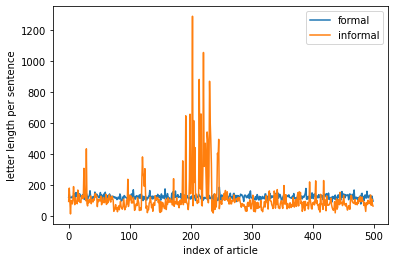

In [14]:
index  = np.arange(document_nr)
plt.plot(index, avg_letter_sentence_formal, label="formal")
plt.plot(index, avg_letter_sentence_informal, label="informal")
plt.legend()
plt.ylabel("letter length per sentence")
plt.xlabel("index of article")

평균 단어수

In [15]:
avg_word_sentence_formal = fword_length/sentence_nr_formal
avg_word_sentence_informal = infword_length/sentence_nr_informal

In [16]:
avg_word_sentence_formal[99]

20.11764705882353

In [17]:
avg_word_sentence_informal[99]

17.6

In [18]:
# function to check the type(passive/active) of sentence
# false -- active, true -- passive
def checkForSentType(inputSentence):   
    getDocFile = nlp(inputSentence)
    
    getAllTags = [token.dep_ for token in getDocFile]
    
    checkPassiveTest = any(['agent' in sublist for sublist in getAllTags])
    
    checkPassiveTestTwo = any(['nsubjpass' in sublist for sublist in getAllTags])

    return checkPassiveTest or checkPassiveTestTwo

nlp = spacy.load("en_core_web_sm")
def check_pass_art(article):
    nr = 0
    for sent in article:
        if checkForSentType(sent):
            nr = nr+1

    return nr

단어 길이

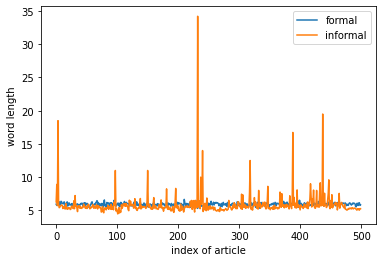

In [20]:
index  = np.arange(document_nr)
plt.plot(index, avg_formal_word_length, label="formal")
plt.plot(index, avg_informal_word_length, label="informal")
plt.legend()
plt.ylabel("word length")
plt.xlabel("index of article")
plt.savefig('word.png')

In [21]:
## Example Sentences. 한번에 하나씩만

# checkForSentType("The hunter killed the lion.")
# checkForSentType("The lion was killed by the hunter.")

# checkForSentType("Someone has cleaned the windows.")
# checkForSentType("The windows have been cleaned.")

# checkForSentType("At each concert, the soprano sang at least one tune from a well-known opera.")
# checkForSentType("At each concert, at least one tune from a well-known opera was sung by the soprano.")

# checkForSentType("Asbestos abatement teams will remove large chunks of asbestos-laden material from the hallways on the second and third floors.")
# checkForSentType("Large chunks of asbestos-laden material will be removed from the hallways on the second and third floors by asbestos abatement teams.")

checkForSentType("It was taken from me") #True는 Passive

True

단어 수

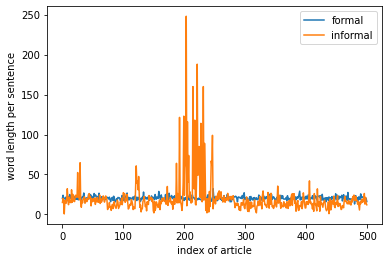

In [22]:
index  = np.arange(document_nr)
plt.plot(index, avg_word_sentence_formal, label="formal")
plt.plot(index, avg_word_sentence_informal, label="informal")
plt.legend()
plt.ylabel("word length per sentence")
plt.xlabel("index of article")
plt.savefig('word.png')

수동태

In [23]:
formal_pass = list(check_pass_art(para) for para in formal_articles_in_sentences)
informal_pass = list(check_pass_art(para) for para in informal_articles_in_sentences)
norm_formal_pass = formal_pass/sentence_nr_formal
norm_informal_pass = informal_pass/sentence_nr_informal

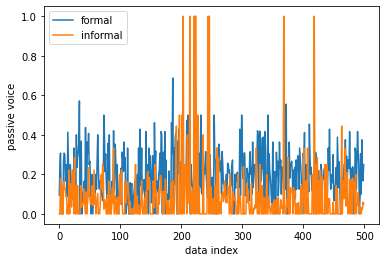

In [24]:
index  = np.arange(document_nr)
plt.plot(index, norm_formal_pass, label="formal")
plt.plot(index, norm_informal_pass, label="informal")
plt.legend()
plt.ylabel("passive voice")
plt.xlabel("data index")
plt.savefig('passive.png')

Formal/Informal Pronoun

In [25]:
nr_fotone_formal =np.array( [check_tone_nr(para, formal_pronoun_list) for para in formal_articles])
nr_infotone_formal   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in formal_articles])
nr_fotone_informal =np.array( [check_tone_nr(para, formal_pronoun_list) for para in informal_articles])
nr_infotone_informal   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in informal_articles])

avg_nr_fotone_formal = nr_fotone_formal/fword_length
avg_nr_infotone_formal = nr_infotone_formal/fword_length
avg_nr_fotone_informal= nr_fotone_informal/infword_length
avg_nr_infotone_informal = nr_infotone_informal/infword_length

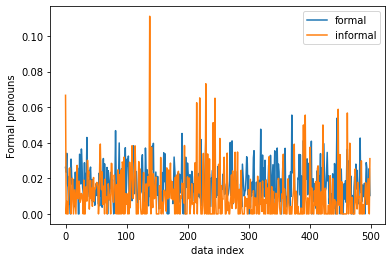

<Figure size 432x288 with 0 Axes>

In [26]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_fotone_formal, label="formal")
plt.plot(index, avg_nr_fotone_informal, label="informal")
plt.legend()
plt.ylabel("Formal pronouns")
plt.xlabel("data index")
plt.show()
plt.savefig('formal_p.png')

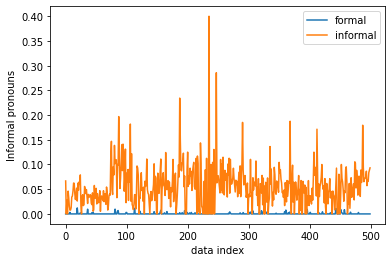

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(index, avg_nr_infotone_formal, label="formal")
plt.plot(index, avg_nr_infotone_informal, label="informal")
plt.legend()
plt.ylabel("Informal pronouns")
plt.xlabel("data index")
plt.show()
plt.savefig('informal_p.png')

In [28]:
formal_vocab_list = read_list("/content/drive/MyDrive/projectFiles/formal_list.txt")

In [29]:
informal_vocab_list = read_list("/content/drive/MyDrive/projectFiles/informal_list.txt")

축약어

In [30]:
contraction = read_list("/content/drive/MyDrive/projectFiles/contraction.txt")

In [31]:
nr_cont_formal   =np.array( [check_tone_nr(para, contraction) for para in formal_articles])
nr_cont_informal =np.array( [check_tone_nr(para, contraction) for para in informal_articles])

In [32]:
avg_nr_cont_formal = nr_cont_formal/fword_length
avg_nr_cont_informal= nr_cont_informal/infword_length

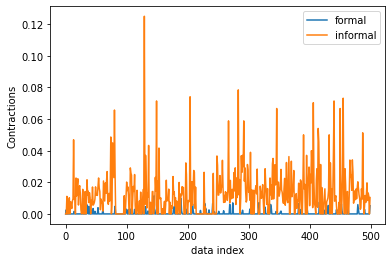

<Figure size 432x288 with 0 Axes>

In [33]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_cont_formal, label="formal")
plt.plot(index, avg_nr_cont_informal, label="informal")
plt.legend()
plt.ylabel("Contractions")
plt.xlabel("data index")
plt.show()
plt.savefig('contract.png')

In [34]:
""" 무시하시오
sum=i=0
for i in range(500):
  sum+=avg_nr_infotone_formal[i]
print(sum/500)

print(avg_nr_infotone_formal)

print(avg_nr_fotone_informal)
print(avg_nr_cont_formal)
print(avg_nr_cont_informal)
"""

' 무시하시오\nsum=i=0\nfor i in range(500):\n  sum+=avg_nr_infotone_formal[i]\nprint(sum/500)\n\nprint(avg_nr_infotone_formal)\n\nprint(avg_nr_fotone_informal)\nprint(avg_nr_cont_formal)\nprint(avg_nr_cont_informal)\n'

Formal/Informal Vocabulary

In [35]:
nr_fword_formal =np.array( [check_word_phrasal(para, formal_vocab_list) for para in formal_articles_in_sentences])
nr_infword_formal   = np.array([check_word_phrasal(para, informal_vocab_list) for para in formal_articles_in_sentences])
nr_fword_informal =np.array([check_word_phrasal(para, formal_vocab_list) for para in informal_articles_in_sentences])
nr_inword_informal   = np.array([check_word_phrasal(para, informal_vocab_list) for para in informal_articles_in_sentences])

avg_nr_fword_formal = nr_fword_formal/fword_length
avg_nr_infword_formal = nr_infword_formal/fword_length
avg_nr_fword_informal= nr_fword_informal/infword_length
avg_nr_infword_informal = nr_inword_informal/infword_length

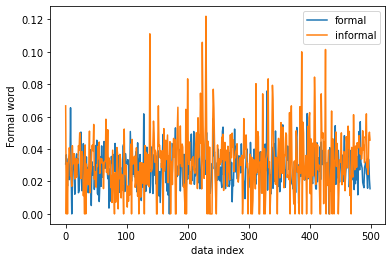

<Figure size 432x288 with 0 Axes>

In [36]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_fword_formal, label="formal")
plt.plot(index, avg_nr_fword_informal, label="informal")
plt.legend()
plt.ylabel("Formal word")
plt.xlabel("data index")
plt.show()
plt.savefig('formal_w.png')

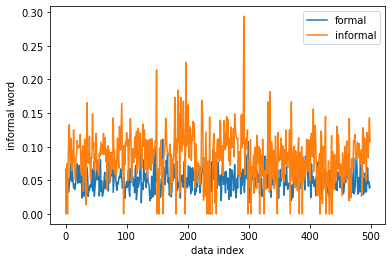

<Figure size 432x288 with 0 Axes>

In [37]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_infword_formal, label="formal")
plt.plot(index, avg_nr_infword_informal, label="informal")
plt.legend()
plt.ylabel("informal word")
plt.xlabel("data index")
plt.show()
plt.savefig('infomal_w.png')

In [38]:
# 9 features
avg_word_sentence =  np.concatenate((avg_word_sentence_formal, avg_word_sentence_informal), axis=None)
avg_word_length    = np.concatenate((avg_formal_word_length, avg_formal_word_length), axis=None)
avg_letter_sentence = np.concatenate((avg_letter_sentence_formal, avg_letter_sentence_informal), axis=None)
norm_pass = np.concatenate((norm_formal_pass, norm_informal_pass), axis=None)
avg_nr_fotone = np.concatenate((avg_nr_fotone_formal, avg_nr_fotone_informal), axis=None)
avg_nr_infotone = np.concatenate((avg_nr_infotone_formal, avg_nr_infotone_informal), axis=None)
avg_nr_infword = np.concatenate((avg_nr_infword_formal, avg_nr_infword_informal), axis=None)
avg_nr_fword = np.concatenate((avg_nr_fword_formal, avg_nr_fword_informal), axis=None)
avg_nr_cont = np.concatenate((avg_nr_cont_formal, avg_nr_cont_informal), axis=None)


In [39]:
X  = np.array([avg_letter_sentence,avg_word_sentence,avg_word_length, norm_pass,avg_nr_fotone,avg_nr_infotone,avg_nr_cont, avg_nr_fword, avg_nr_infword])
X.shape
five_and_eight =  np.array([avg_nr_infotone, avg_nr_infword])
deci_best  = np.array([avg_letter_sentence, avg_nr_fotone, avg_nr_infotone, avg_nr_cont, avg_nr_fword, avg_nr_infword])


In [40]:
# 아웃풋 배열
y_train_r = np.array([y_train])
y_test_r = np.array([y_test])

In [41]:
X_train_real  = []
for index in X_train:
    X_train_real.append(X[:, index])
    
X_train_r2 = np.array(X_train_real).reshape(len(X[:,1]),len(X_train_real))

In [42]:
X_test_real = []
for index in X_test:
    X_test_real.append(X[:, index])
X_test_r2 = np.array(X_test_real).reshape(len(X[:,1]),len(X_test_real))
X_test_r2.shape

(9, 250)

Logistic Regression

In [43]:
d = model(np.array(five_and_eight), np.array(Y), np.array(five_and_eight), np.array(Y), num_iterations=2000, learning_rate=0.01, print_cost=True)
print(d["w"])


train accuracy: 94.2 %
test accuracy: 94.2 %
[[-0.27585934]
 [-0.17054488]]


In [44]:
import sklearn.linear_model as lm
clf = lm.LogisticRegression(random_state=0).fit(np.array(five_and_eight).T,np.array(Y).T)
print("test: " , clf.score(np.array(five_and_eight).T,np.array(Y).T))
[w] = clf.coef_
b = clf.intercept_
print("w",clf.coef_)
print("b",clf.intercept_)

test:  0.908
w [[-9.64046795 -5.77709476]]
b [0.65916812]


In [45]:
sigmoid(five_and_eight.T[300].dot(np.array(w))+b)


array([0.63772083])

Decision Tree

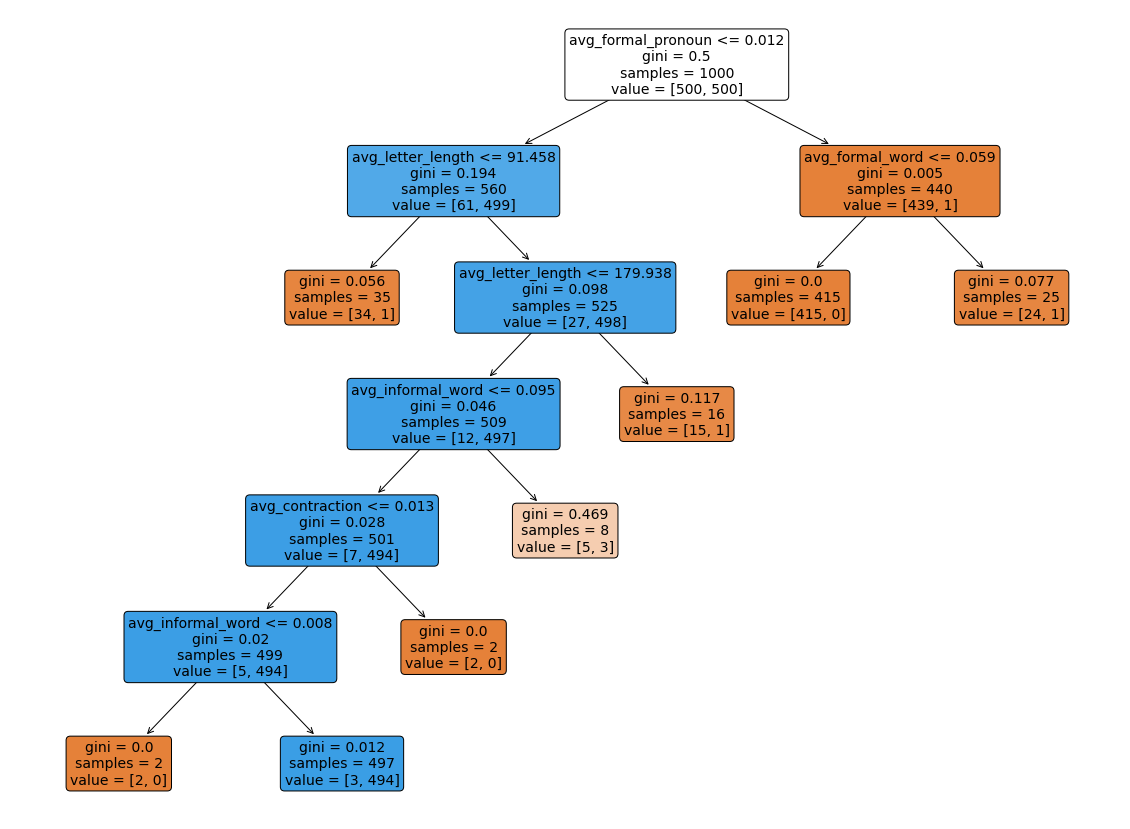

In [46]:
mss = 50
md=6
feature_names = []
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md) # min_samples_split： minumum samples requires to split
deci_tree  = deci_tree.fit(np.array(deci_best).T,np.array(Y).T)
plt.figure(figsize=(20,15))
tree.plot_tree(deci_tree,
               feature_names=['avg_letter_length', 'avg_word_length', 'avg_formal_pronoun', 'avg_contraction', 'avg_formal_word', 'avg_informal_word'],
               impurity=True, filled=True,
               rounded=True) 
plt.show()
train_predict = deci_tree.predict(np.array(deci_best).T)

accu = accuracy_score(np.array(Y).T, train_predict)
print("accuracy: ", accu )
test_predict = deci_tree.predict(deci_best.T)

In [47]:
print(np.corrcoef(avg_word_sentence,avg_letter_sentence)) 
# 두 feature 상관관계가 높음

accuracy:  0.991
[[1.         0.97437105]
 [0.97437105 1.        ]]


Feature Selection 진행

In [48]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

features: [5 8]
accuracy:  0.909
ranking:  [8 6 7 2 4 1 3 5 1]


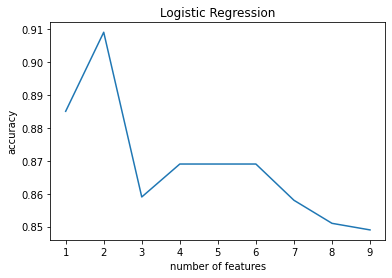

In [49]:
logreg = lm.LogisticRegression(solver='liblinear')
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=logreg, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("features:", list_features)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")
print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)
plt.title("Logistic Regression")
plt.show()

features: [0 1 2 3 4 5 6 7 8]
accuracy:  0.984
ranking:  [1 1 1 1 1 1 1 1 1]


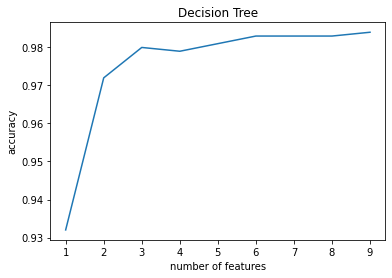

In [50]:
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)

rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("features:", list_features)

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1),rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)
plt.title("Decision Tree")
plt.show()

features: [0 1 3 4 5 6 7 8]
accuracy:  0.9890000000000001
ranking:  [1 1 2 1 1 1 1 1 1]


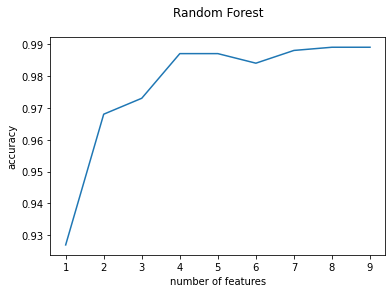

In [51]:
logreg = lm.LogisticRegression()
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=forest, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("features:", list_features)

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)

plt.title("Random Forest\n")
plt.show()

In [52]:
x_scaled = np.array(X).T
y_s = np.array(Y).T
lr = lm.LogisticRegression(solver='liblinear')

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(x_scaled,y_s):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append( lr.score(x_test_fold, y_test_fold))
print('List of possible accuracy for logistic regression:', lst_accu_stratified)
print('\nMaximum Accuracy:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:', stdev(lst_accu_stratified))

List of possible accuracy for logistic regression: [0.85, 0.82, 0.81, 0.87, 0.84, 0.84, 0.86, 0.87, 0.92, 0.81]

Maximum Accuracy: 92.0 %

Minimum Accuracy: 81.0 %

Overall Accuracy: 84.89999999999999 %

Standard Deviation: 0.03348299734359383


In [53]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(five_and_eight).T
y_s = np.array(Y).T
lr =  tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(five_and_eight).T,np.array(Y).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for decision tree:', lst_accu_stratified)
print('\nMaximum Accuracys:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:', stdev(lst_accu_stratified))

List of possible accuracy for decision tree: [0.96, 0.97, 0.97, 0.95, 0.96, 0.97, 0.98, 0.96, 0.98, 0.96]

Maximum Accuracys: 98.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 96.6 %

Standard Deviation: 0.009660917830792967


In [54]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(X).T
y_s = np.array(Y).T
lr =  RandomForestClassifier(random_state=101)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(X).T,np.array(Y).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for random forest:', lst_accu_stratified)
print('\nMaximum Accuracy:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:', stdev(lst_accu_stratified))

List of possible accuracy for random forest: [1.0, 1.0, 0.98, 1.0, 0.97, 0.99, 1.0, 0.97, 0.99, 0.99]

Maximum Accuracy: 100.0 %

Minimum Accuracy: 97.0 %

Overall Accuracy: 98.9 %

Standard Deviation: 0.011972189997378658


In [55]:
y_s.shape

(1000,)

K-nearest Neighbor

In [56]:
"""
adapted from assignment 6 from data mining course Radboud University
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from toolbox import classification_plot as cp
import seaborn as sn

def plot_confusion_matrix(cm,y):

df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
              columns = [i+1 for i in np.unique(y)])
plt.figure()
sn.heatmap(df_cm, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
abel('Actual class')
plt.show()

knn_neighbor = KNeighborsClassifier(metric = 'euclidean')
knn_neighbor.fit(X_train_r2.T,y_train_r.T)
pred = knn_neighbor.predict(X_test_r2.T)
cp.classification_plot(X_test_r2.T, y_test_r.T, pred,X_train_r2.T,y_train_r.T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("3.1 KNN classifier with grades features")
plt.show()

acc= accuracy_score(pred, y_test)
error = 1-acc
cm = confusion_matrix(y_test, pred)

plot_confusion_matrix(cm, y_test)
acc, error = metrics(cm)
print('Accuracy: ', acc, 'Error rate: ', error)
"""

'\nadapted from assignment 6 from data mining course Radboud University\nfrom scipy.io import loadmat\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import confusion_matrix\nfrom toolbox import classification_plot as cp\nimport seaborn as sn\n\ndef plot_confusion_matrix(cm,y):\n\ndf_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],\n              columns = [i+1 for i in np.unique(y)])\nplt.figure()\nsn.heatmap(df_cm, annot=True)\nplt.title(\'Confusion matrix\')\nplt.xlabel(\'Predicted class\')\nabel(\'Actual class\')\nplt.show()\n\nknn_neighbor = KNeighborsClassifier(metric = \'euclidean\')\nknn_neighbor.fit(X_train_r2.T,y_train_r.T)\npred = knn_neighbor.predict(X_test_r2.T)\ncp.classification_plot(X_test_r2.T, y_test_r.T, pred,X_train_r2.T,y_train_r.T)\nplt.xlabel("x")\nplt.ylabel("y")\nplt.title("3.1 KNN classifier with grades features")\nplt.show()\n\nacc= accuracy_score(pred, y_test)\nerror = 1-acc\ncm = confusion_matrix(y_test, pred)\n\nplot_con

In [57]:
classone = pd.read_excel('/content/drive/MyDrive/projectFiles/formal.xlsx',header = None)
classone_articles  = list(para.lower() for para in classone.values[:,0])
classtwo = pd.read_excel('/content/drive/MyDrive/projectFiles/informal.xlsx',header = None)
classtwo_articles  = list(para.lower() for para in classtwo.values[:,0])
classthree = pd.read_excel('/content/drive/MyDrive/projectFiles/semi-formalsemi-informal.xlsx', header = None)
classthree_articles  = list(para.lower() for para in classthree.values[:,0])


def articles_size(articles):
    articles_size = []
    for article in articles:
        articles_size.append(len(article))
        
    return articles_size

class_one_size = articles_size(classone_articles)
class_two_size = articles_size(classtwo_articles)
class_three_size = articles_size(classthree_articles)

print("Total formal article: ",len(classone_articles))
print("average: ",np.average(class_one_size))
print("max",np.max(class_one_size))
print("min",np.min(class_one_size))
print("Total semi-formal/informal article: ",len(classtwo_articles))
print("average: ",np.average(class_two_size))
print("max",np.max(class_two_size))
print("min",np.min(class_two_size))
print("Total informal article: ",len(classthree_articles))
print("average: ",np.average(class_three_size))
print("max",np.max(class_three_size))
print("min",np.min(class_three_size))

Total formal article:  50
average:  5650.28
max 32767
min 926
Total semi-formal/informal article:  50
average:  9855.82
max 32767
min 429
Total informal article:  50
average:  5629.32
max 14370
min 1010


In [58]:
classone_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classone_articles)
classtwo_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classtwo_articles)
classthree_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classthree_articles)

classone_articles_sentence_number = np.array(list(len(ls) for ls in classone_articles_in_sentences), dtype=np.float)
classtwo_articles_sentence_number = np.array(list(len(ls) for ls in classtwo_articles_in_sentences), dtype=np.float)
classthree_articles_sentence_number = np.array(list(len(ls) for ls in classthree_articles_in_sentences), dtype=np.float)

# 새로 변경한 word_list
# new_word_list_each_sentence_in_an_article_formal = []
# new_word_nr_formal = []
# for para in new_formal_test_articles_in_sentences:
#     new_para = []
#     word_nr = []
#     for sent in para:
#         sent_in_word  = nltk.tokenize.word_tokenize(sent)
#         word_nr.append(len(sent_in_word))
#         new_para.append(sent_in_word)
#     new_word_nr_formal.append(word_nr)

# new_word_number_formal_list = np.array(list(sum(para) for para in new_word_nr_formal),dtype=np.float)#= np.array(word_nr_formal), dtype=np.float)
class_one_word_length  = np.array([len(art.split()) for art in classone_articles])
class_two_word_length  = np.array([len(art.split()) for art in classtwo_articles])
class_three_word_length  = np.array([len(art.split()) for art in classthree_articles])

classone_article_length = np.array(list(len(para) for para in classone_articles), dtype=np.float)
classtwo_article_length = np.array(list(len(para) for para in classtwo_articles), dtype=np.float)
classthree_article_length = np.array(list(len(para) for para in classthree_articles), dtype=np.float)

classone_avg_letter_sentence = classone_article_length/classone_articles_sentence_number
classtwo_avg_letter_sentence = classone_article_length/classtwo_articles_sentence_number
classthree_avg_letter_sentence = classone_article_length/classthree_articles_sentence_number

classone_avg_word_sentence = class_one_word_length/classone_articles_sentence_number
classtwo_avg_word_sentence= class_two_word_length/classone_articles_sentence_number
classthree_avg_word_sentence = class_three_word_length/classone_articles_sentence_number

classone_word_length =  classone_article_length/ class_one_word_length
classtwo_word_length =  classtwo_article_length/ class_two_word_length
classthree_word_length =  classthree_article_length/ class_three_word_length

classone_pass = list(check_pass_art(para) for para in classone_articles_in_sentences)
classtwo_pass = list(check_pass_art(para) for para in classtwo_articles_in_sentences)
classthree_pass = list(check_pass_art(para) for para in classthree_articles_in_sentences)

classone_norm_pass = classone_pass/classone_articles_sentence_number
classtwo_norm_pass = classtwo_pass/classtwo_articles_sentence_number
classthree_norm_pass = classthree_pass/classthree_articles_sentence_number

classone_nr_infotone   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in classone_articles])
classone_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classone_articles])
classtwo_nr_infotone = np.array( [check_tone_nr(para, informal_pronoun_list) for para in classtwo_articles])
classtwo_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classtwo_articles])
classthree_nr_infotone   = np.array( [check_tone_nr(para, informal_pronoun_list) for para in classthree_articles])
classthree_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classthree_articles])

classone_avg_nr_fotone = classone_nr_fotone/class_one_word_length
classone_avg_nr_infotonel = classone_nr_infotone/class_one_word_length
classtwo_avg_nr_fotone = classtwo_nr_fotone/class_two_word_length
classtwo_avg_nr_infotonel = classtwo_nr_infotone/class_two_word_length
classthree_avg_nr_fotone = classthree_nr_fotone/class_three_word_length
classthree_avg_nr_infotonel = classthree_nr_infotone/class_three_word_length

classone_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classone_articles])
classtwo_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classtwo_articles])
classthree_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classthree_articles])

classone_avg_nr_cont = classone_nr_cont/class_one_word_length
classtwo_avg_nr_cont = classtwo_nr_cont/class_two_word_length
classthree_avg_nr_cont = classthree_nr_cont/class_three_word_length

classone_nr_fword =np.array([check_word_phrasal(para, formal_vocab_list) for para in classone_articles_in_sentences])
classtwo_nr_fword =np.array([check_word_phrasal(para, formal_vocab_list) for para in classtwo_articles_in_sentences])
classthree_nr_fword =np.array([check_word_phrasal(para, formal_vocab_list) for para in classthree_articles_in_sentences])

classone_nr_infword   = np.array([check_word_phrasal(para, informal_vocab_list) for para in classone_articles_in_sentences])
classtwo_nr_infword   = np.array([check_word_phrasal(para, informal_vocab_list) for para in classtwo_articles_in_sentences])
classthree_nr_infword   = np.array([check_word_phrasal(para, informal_vocab_list) for para in classthree_articles_in_sentences])

classone_avg_nr_fword = classone_nr_fword/class_one_word_length
classtwo_avg_nr_fword = classtwo_nr_fword/class_two_word_length
classthree_avg_nr_fword = classthree_nr_fword/class_three_word_length

classone_avg_nr_infword = classone_nr_infword/class_one_word_length
classtwo_avg_nr_infword = classtwo_nr_infword/class_two_word_length
classthree_avg_nr_infword = classthree_nr_infword/class_three_word_length

<ipython-input-58-8ffbe9159983>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classone_articles_sentence_number = np.array(list(len(ls) for ls in classone_articles_in_sentences), dtype=np.float)
<ipython-input-58-8ffbe9159983>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classtwo_articles_sentence_number = np.array(list(len(ls) for

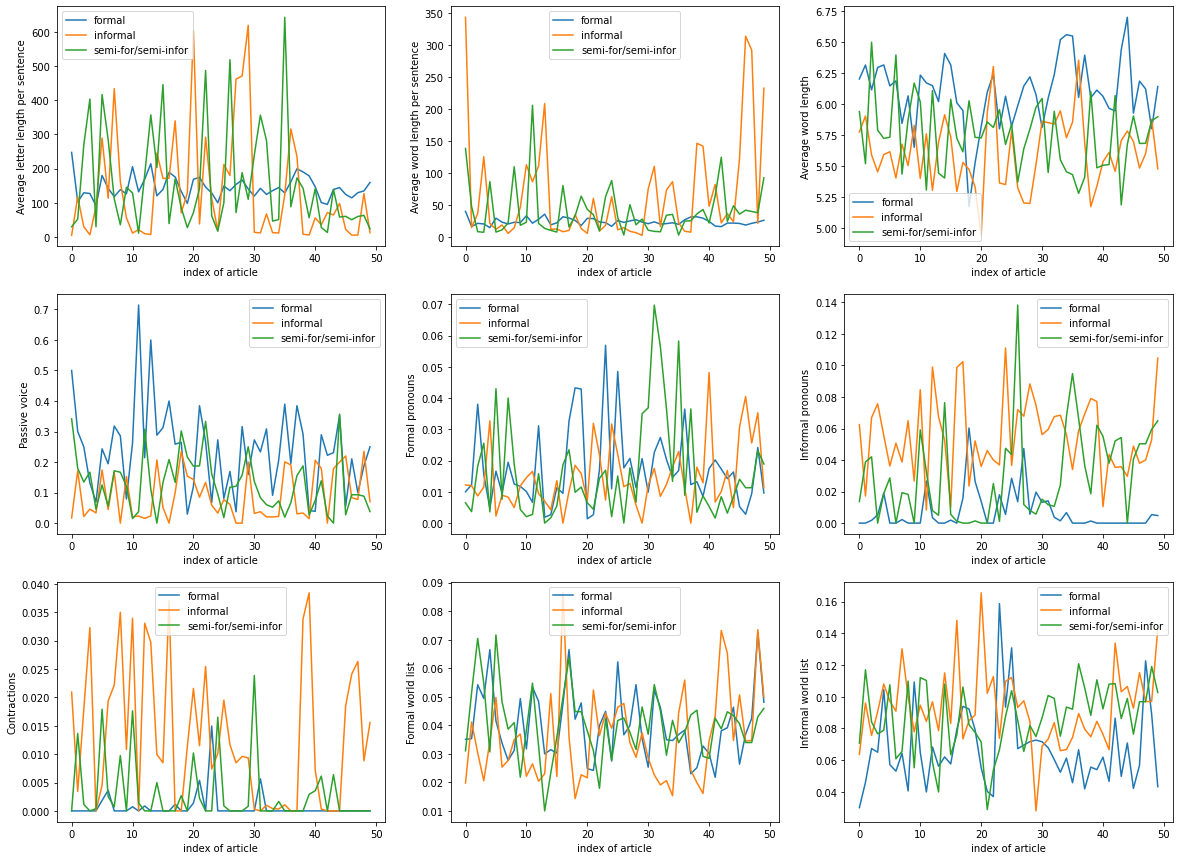

In [59]:
index  = np.arange(50)
plt.figure(figsize=(20, 15))

plt.subplot(331)
plt.plot(index, classone_avg_letter_sentence, label="formal")
plt.plot(index, classtwo_avg_letter_sentence, label="informal")
plt.plot(index, classthree_avg_letter_sentence, label="semi-for/semi-infor")
plt.ylabel("Average letter length per sentence")
plt.xlabel("index of article")
plt.legend()

plt.subplot(332)
plt.plot(index, classone_avg_word_sentence, label="formal")
plt.plot(index, classtwo_avg_word_sentence, label="informal")
plt.plot(index, classthree_avg_word_sentence, label="semi-for/semi-infor")
plt.ylabel("Average word length per sentence")
plt.xlabel("index of article")
plt.legend()


plt.subplot(333)
plt.plot(index, classone_word_length, label="formal")
plt.plot(index, classtwo_word_length, label="informal")
plt.plot(index, classthree_word_length, label="semi-for/semi-infor")
plt.ylabel("Average word length")
plt.xlabel("index of article")
plt.legend()

plt.subplot(334)
plt.plot(index, classone_norm_pass, label="formal")
plt.plot(index, classtwo_norm_pass, label="informal")
plt.plot(index, classthree_norm_pass, label="semi-for/semi-infor")
plt.ylabel("Passive voice")
plt.xlabel("index of article")
plt.legend()

plt.subplot(335)
plt.plot(index, classone_avg_nr_fotone, label="formal")
plt.plot(index, classtwo_avg_nr_fotone, label="informal")
plt.plot(index, classthree_avg_nr_fotone, label="semi-for/semi-infor")
plt.ylabel("Formal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(336)
plt.plot(index, classone_avg_nr_infotonel, label="formal")
plt.plot(index, classtwo_avg_nr_infotonel, label="informal")
plt.plot(index, classthree_avg_nr_infotonel, label="semi-for/semi-infor")
plt.ylabel("Informal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(337)
plt.plot(index, classone_avg_nr_cont, label="formal")
plt.plot(index, classtwo_avg_nr_cont, label="informal")
plt.plot(index, classthree_avg_nr_cont, label="semi-for/semi-infor")
plt.ylabel("Contractions")
plt.xlabel("index of article")
plt.legend()

plt.subplot(338)
plt.plot(index, classone_avg_nr_fword, label="formal")
plt.plot(index, classtwo_avg_nr_fword, label="informal")
plt.plot(index, classthree_avg_nr_fword, label="semi-for/semi-infor")
plt.ylabel("Formal world list")
plt.xlabel("index of article")
plt.legend()

plt.subplot(339)
plt.plot(index, classone_avg_nr_infword, label="formal")
plt.plot(index, classtwo_avg_nr_infword, label="informal")
plt.plot(index, classthree_avg_nr_infword, label="semi-for/semi-infor")
plt.ylabel("Informal world list")
plt.xlabel("index of article")
plt.legend()

plt.show()

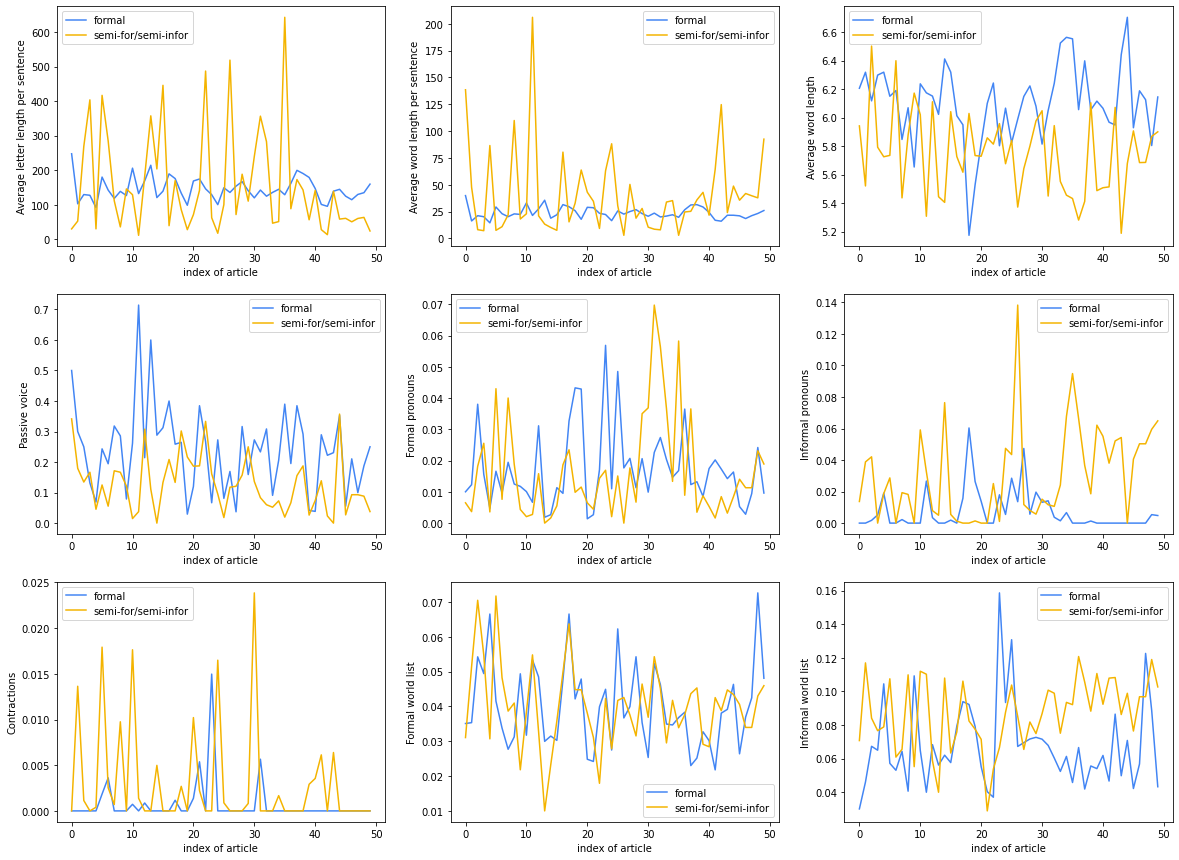

In [60]:
### formal & semi-formal/semi-informal
index  = np.arange(50)
plt.figure(figsize=(20, 15))

plt.subplot(331)
plt.plot(index, classone_avg_letter_sentence, '#4285F4', label="formal")
plt.plot(index, classthree_avg_letter_sentence, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average letter length per sentence")
plt.xlabel("index of article")
plt.legend()

plt.subplot(332)
plt.plot(index, classone_avg_word_sentence, '#4285F4', label="formal")
plt.plot(index, classthree_avg_word_sentence, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average word length per sentence")
plt.xlabel("index of article")
plt.legend()


plt.subplot(333)
plt.plot(index, classone_word_length, '#4285F4', label="formal")
plt.plot(index, classthree_word_length, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average word length")
plt.xlabel("index of article")
plt.legend()

plt.subplot(334)
plt.plot(index, classone_norm_pass, '#4285F4', label="formal")
plt.plot(index, classthree_norm_pass, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Passive voice")
plt.xlabel("index of article")
plt.legend()

plt.subplot(335)
plt.plot(index, classone_avg_nr_fotone, '#4285F4', label="formal")
plt.plot(index, classthree_avg_nr_fotone, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Formal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(336)
plt.plot(index, classone_avg_nr_infotonel, '#4285F4', label="formal")
plt.plot(index, classthree_avg_nr_infotonel, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Informal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(337)
plt.plot(index, classone_avg_nr_cont, '#4285F4', label="formal")
plt.plot(index, classthree_avg_nr_cont, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Contractions")
plt.xlabel("index of article")
plt.legend()

plt.subplot(338)
plt.plot(index, classone_avg_nr_fword, '#4285F4', label="formal")
plt.plot(index, classthree_avg_nr_fword, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Formal world list")
plt.xlabel("index of article")
plt.legend()

plt.subplot(339)
plt.plot(index, classone_avg_nr_infword, '#4285F4', label="formal")
plt.plot(index, classthree_avg_nr_infword, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Informal world list")
plt.xlabel("index of article")
plt.legend()

plt.show()

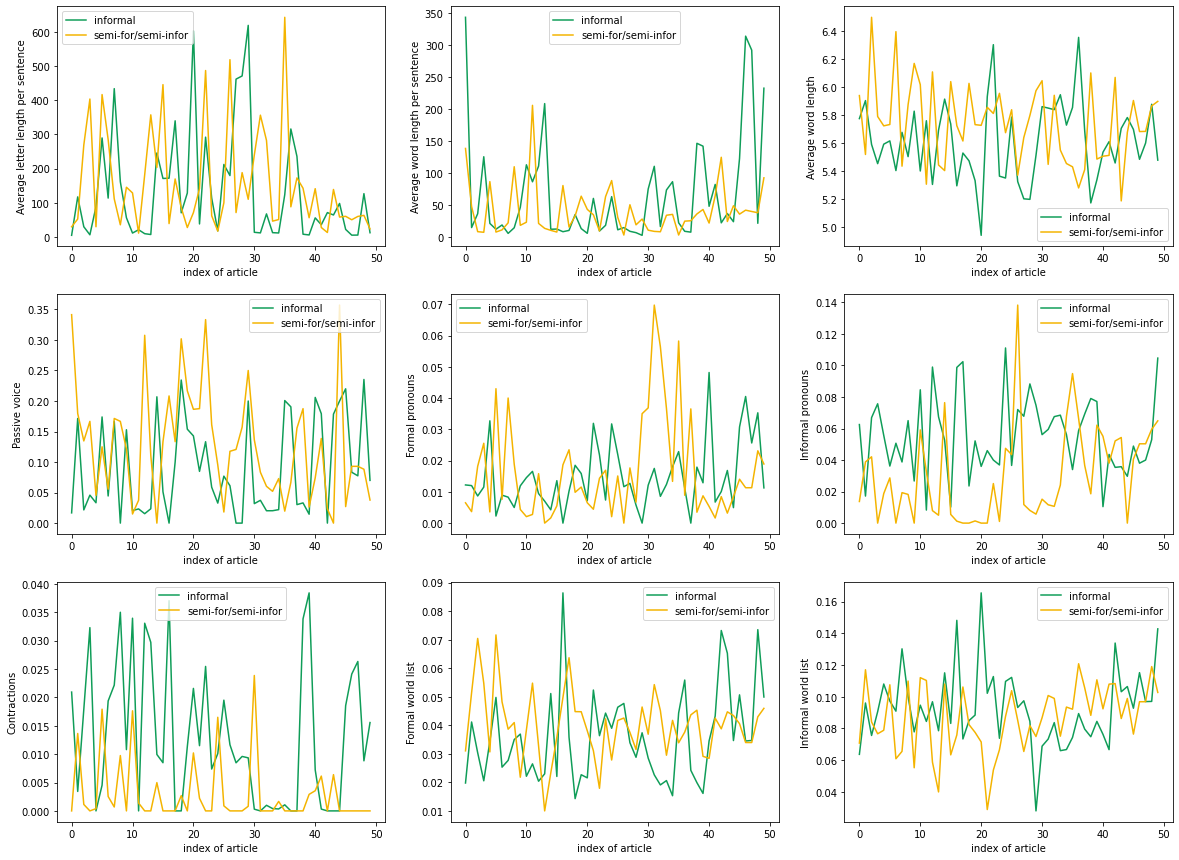

In [61]:
### informal & semi-formal/semi-informal
index  = np.arange(50)
plt.figure(figsize=(20, 15))

plt.subplot(331)
plt.plot(index, classtwo_avg_letter_sentence, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_letter_sentence, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average letter length per sentence")
plt.xlabel("index of article")
plt.legend()

plt.subplot(332)
plt.plot(index, classtwo_avg_word_sentence, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_word_sentence, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average word length per sentence")
plt.xlabel("index of article")
plt.legend()


plt.subplot(333)
plt.plot(index, classtwo_word_length, '#0F9D58', label="informal")
plt.plot(index, classthree_word_length, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Average word length")
plt.xlabel("index of article")
plt.legend()

plt.subplot(334)
plt.plot(index, classtwo_norm_pass, '#0F9D58', label="informal")
plt.plot(index, classthree_norm_pass, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Passive voice")
plt.xlabel("index of article")
plt.legend()

plt.subplot(335)
plt.plot(index, classtwo_avg_nr_fotone, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_nr_fotone, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Formal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(336)
plt.plot(index, classtwo_avg_nr_infotonel, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_nr_infotonel, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Informal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(337)
plt.plot(index, classtwo_avg_nr_cont, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_nr_cont, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Contractions")
plt.xlabel("index of article")
plt.legend()

plt.subplot(338)
plt.plot(index, classtwo_avg_nr_fword, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_nr_fword, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Formal world list")
plt.xlabel("index of article")
plt.legend()

plt.subplot(339)
plt.plot(index, classtwo_avg_nr_infword, '#0F9D58', label="informal")
plt.plot(index, classthree_avg_nr_infword, '#F4B400', label="semi-for/semi-infor")
plt.ylabel("Informal world list")
plt.xlabel("index of article")
plt.legend()

plt.show()

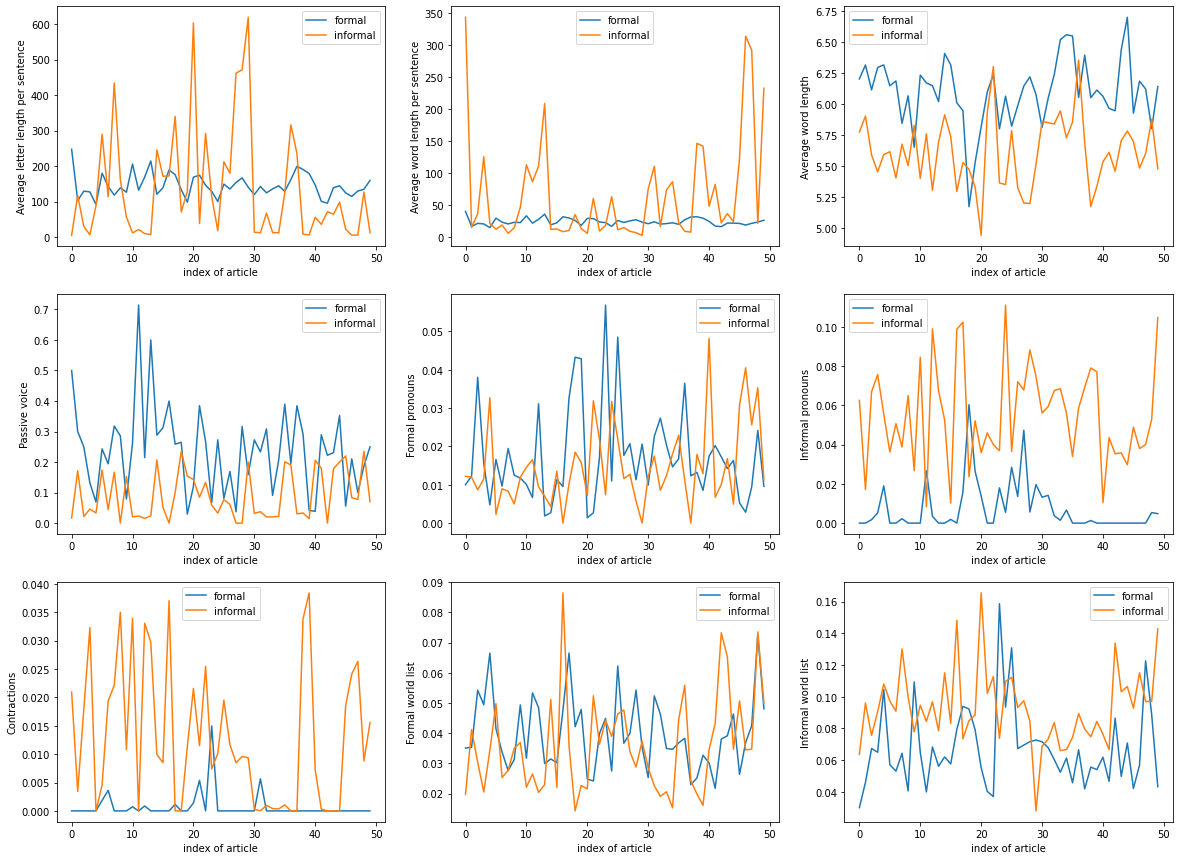

In [62]:
index  = np.arange(50)
plt.figure(figsize=(20, 15))

plt.subplot(331)
plt.plot(index, classone_avg_letter_sentence, label="formal")
plt.plot(index, classtwo_avg_letter_sentence, label="informal")
plt.ylabel("Average letter length per sentence")
plt.xlabel("index of article")
plt.legend()

plt.subplot(332)
plt.plot(index, classone_avg_word_sentence, label="formal")
plt.plot(index, classtwo_avg_word_sentence, label="informal")
plt.ylabel("Average word length per sentence")
plt.xlabel("index of article")
plt.legend()


plt.subplot(333)
plt.plot(index, classone_word_length, label="formal")
plt.plot(index, classtwo_word_length, label="informal")
plt.ylabel("Average word length")
plt.xlabel("index of article")
plt.legend()

plt.subplot(334)
plt.plot(index, classone_norm_pass, label="formal")
plt.plot(index, classtwo_norm_pass, label="informal")
plt.ylabel("Passive voice")
plt.xlabel("index of article")
plt.legend()

plt.subplot(335)
plt.plot(index, classone_avg_nr_fotone, label="formal")
plt.plot(index, classtwo_avg_nr_fotone, label="informal")
plt.ylabel("Formal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(336)
plt.plot(index, classone_avg_nr_infotonel, label="formal")
plt.plot(index, classtwo_avg_nr_infotonel, label="informal")
plt.ylabel("Informal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(337)
plt.plot(index, classone_avg_nr_cont, label="formal")
plt.plot(index, classtwo_avg_nr_cont, label="informal")
plt.ylabel("Contractions")
plt.xlabel("index of article")
plt.legend()

plt.subplot(338)
plt.plot(index, classone_avg_nr_fword, label="formal")
plt.plot(index, classtwo_avg_nr_fword, label="informal")
plt.ylabel("Formal world list")
plt.xlabel("index of article")
plt.legend()

plt.subplot(339)
plt.plot(index, classone_avg_nr_infword, label="formal")
plt.plot(index, classtwo_avg_nr_infword, label="informal")
plt.ylabel("Informal world list")
plt.xlabel("index of article")
plt.legend()

plt.show()

In [63]:
avg_letter_sentence = np.concatenate((classone_avg_letter_sentence, classtwo_avg_letter_sentence, classthree_avg_letter_sentence), axis=None)
avg_word_sentence = np.concatenate((classone_avg_word_sentence, classtwo_avg_word_sentence, classthree_avg_word_sentence), axis=None)
avg_word_length = np.concatenate((classone_word_length, classtwo_word_length, classthree_word_length), axis=None)
norm_pass = np.concatenate((classone_norm_pass, classtwo_norm_pass, classthree_norm_pass), axis=None)
avg_nr_fotone = np.concatenate((classone_avg_nr_fotone, classtwo_avg_nr_fotone, classthree_avg_nr_fotone), axis=None)
avg_nr_infotonel = np.concatenate((classone_avg_nr_infotonel, classtwo_avg_nr_infotonel, classthree_avg_nr_infotonel), axis=None)
avg_nr_cont = np.concatenate((classone_avg_nr_cont, classtwo_avg_nr_cont, classthree_avg_nr_cont), axis =None)
avg_nr_fword = np.concatenate((classone_avg_nr_fword, classtwo_avg_nr_fword, classthree_avg_nr_fword), axis =None)
avg_nr_infword = np.concatenate((classone_avg_nr_infword, classtwo_avg_nr_infword, classthree_avg_nr_infword), axis =None)

In [64]:
features= np.array([avg_letter_sentence, avg_word_sentence, avg_word_length, norm_pass,avg_nr_fotone,avg_nr_infotonel,avg_nr_cont, avg_nr_fword, avg_nr_infword])

In [65]:
labels  =  np.array([1]*50 + [2]*50 +[3]*50)

In [66]:
scaler = preprocessing.MinMaxScaler()
x_s = np.array(features).T
y_s = np.array(labels).T
lr = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_s[train_index], x_s[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.6, 0.8, 0.7333333333333333, 0.8, 0.4666666666666667, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.9333333333333333]

Maximum Accuracy That can be obtained from this model is: 93.33333333333333 %

Minimum Accuracy: 46.666666666666664 %

Overall Accuracy: 66.0 %

Standard Deviation is: 0.15539674432930747


In [67]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(features).T
y_s = np.array(labels).T
lr =forest = RandomForestClassifier(random_state=101)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for decision tree:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy for decision tree: [0.6, 0.7333333333333333, 0.5333333333333333, 0.6666666666666666, 0.4666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.8666666666666667]

Maximum Accuracy That can be obtained from this model is: 86.66666666666667 %

Minimum Accuracy: 46.666666666666664 %

Overall Accuracy: 65.99999999999999 %

Standard Deviation is: 0.11088866622110799


In [68]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(features).T
y_s = np.array(labels).T
lr = lm.LogisticRegression(multi_class='ovr', solver='liblinear')

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append( lr.score(x_test_fold, y_test_fold))
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6, 0.4666666666666667, 0.6, 0.4666666666666667, 0.4666666666666667, 0.4]

Maximum Accuracy That can be obtained from this model is: 60.0 %

Minimum Accuracy: 40.0 %

Overall Accuracy: 51.33333333333333 %

Standard Deviation is: 0.07062332703142533


important features: [2 5]
Optimal numbers of features:2
:  0.6733333333333332


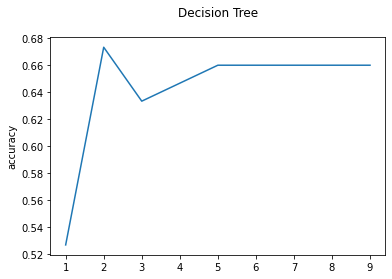

In [69]:
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.ylabel("accuracy")

print(": ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])

plt.title("Decision Tree\n")
plt.show()

important features: [0 1 2 5 6 8]
Optimal numbers of features:6
:  0.7133333333333333


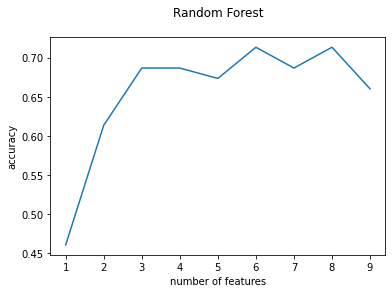

In [70]:
logreg = lm.LogisticRegression()
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=forest, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print(": ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])

plt.title("Random Forest\n")
plt.show()

important features: [0 1 2 3 4 5 6 7 8]
Optimal numbers of features:9
accuracy:  0.5133333333333334


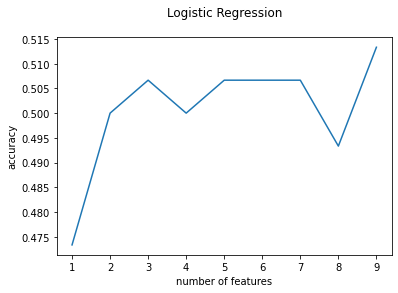

In [71]:
logreg = lm.LogisticRegression(multi_class='ovr', solver='liblinear')
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=logreg, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_ -1])

plt.title("Logistic Regression\n")
plt.show()